In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp

import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

#sp.latex=lambda expr, **settings:ml.PQLatexPrinter(settings).doprint(expr)
sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)
#sp.Basic.__str__=lambda expr, **settings:ml.PQLatexPrinter(settings).doprint(expr)
#sp.init_printing(latex_printer=ml.PQLatexPrinter)
#sp.init_printing()
#sp.Basic.__str__ = lambda self: ml.PQLatexPrinter().doprint(self)

In [3]:
a = ml.PQ(12345.6*u.m, sigma=3*u.m, dim=u.m)
print(a) #12346±3 meter (0.024%)
a1 = ml.PQ(12345.5*u.m, sigma=3*u.m, dim=u.m)
print(a1) #12346±3 meter (0.024%)
b = ml.PQ(12345.4*u.m, sigma=3*u.m, dim=u.m)
print(b) #12345±3 meter (0.024%)
c = ml.PQ(0.4*u.m, sigma=0.3*u.m, dim=u.m)
print(c) #0.4±0.3 meter (75%)
d = ml.PQ(0.4*u.m, sigma=0.03*u.m, dim=u.m)
print(d) #0.40±0.03 meter (7.5%)
e = ml.PQ(0.00004*u.m, sigma=0.000003*u.m)
print(e) #(4.0±0.3)*10^-5 meter (7.5%)
f = ml.PQ(123456*u.m, sigma=3000*u.m)
print(f) #(12.3±0.3)*10^4 meter (2.4%)
g = ml.PQ(100000*u.m, sigma=3*u.m)
print(g) #100000±3 meter (0.0030%)
#display(32*u.m)
#display(a)
#print(sp.latex(a))
#display(sp.latex(a))
#a

12346±3 m (0.024%)
12346±3 m (0.024%)
12345±3 m (0.024%)
0.4±0.3 m (75%)
0.40±0.03 m (7.5%)
(4.0±0.3)*10^-5 m (7.5%)
(12.3±0.3)*10^4 m (2.4%)
100000±3 m (0.0030%)


In [4]:

a = ml.PQ(1.0*u.m, dim=u.meter, sigma=1.0*u.mm) # Почему meter/m не считается?
b = ml.PQ(2.0*u.m, sigma=1.0*u.mm)
c = ml.PQ(2.0*u.m, sigma=1.0*u.mm)
d = ml.PQ(3.0*u.mm, sigma=0.02*u.mm)
t = ml.PQ(2.0*u.s,  sigma=0.01*u.s)
try:
    test = ml.PQ(a, sigma=2*u.m)
except Exception:
    pass
arr = ml.pqarray([a, b, c])

print(a) #1.0000±0.0010 meter (0.10%)
print(b) #2.0000±0.0010 meter (0.050%)
print(c) #2.0000±0.0010 meter (0.050%)
print(d) #3.0±2.0 millimeter (67%)
print(t) #2.000±0.010 second (0.50%)
# type(u.m)
# u.convert_to(a.sigma, a.dim)
print(a+b) #3.0000±0.0014 meter (0.047%)
print((a*3)) #3.000±0.003 meter (0.10%)
print(a*b) #2.0000±0.0022 meter**2 (0.11%)
print(a/b) # 0.500000±0.000559 1 (0.001118)
print((u.s/b).val) #Откуда берётся 2?
print(1/b) #(5000.00±2.50)*10^-4 1/meter (0.050%)

# type(u.m.args[1])
print(arr)
print((arr-a)[0].dim)
print(a*2)

1.0000±0.0010 m (0.10%)
2.0000±0.0010 m (0.050%)
2.0000±0.0010 m (0.050%)
3.000±0.020 mm (0.67%)
2.000±0.010 s (0.50%)
3.0000±0.0014 m (0.047%)
3.000±0.003 m (0.10%)
2.0000±0.0022 m**2 (0.11%)
(500.0±0.6)*10^-3  (0.11%)
0.5*s/m
(5000.00±2.50)*10^-4 1/m (0.050%)
[1.0000±0.0010 m (0.10%) 2.0000±0.0010 m (0.050%) 2.0000±0.0010 m (0.050%)]
m
2.0000±0.0020 m (0.10%)


In [5]:
import pandas as pd
print(arr,a)
print('-arr', -arr)
print('a+arr', a+arr)
print('arr+a', arr+a)
print('a-arr', (a-arr))
print('arr-a', (arr-a)) # Ошибка в погрешности первого значения
print('b*arr', b*arr)
print('arr*b', arr*b)
print('b/arr', b/arr)
print('arr/b', arr/b)
print('b**[1,2,3]', b**[1,2,3])
print('arr**2', arr**2)
print('np.sqrt(arr)', np.sqrt(arr))

[1.0000±0.0010 m (0.10%) 2.0000±0.0010 m (0.050%) 2.0000±0.0010 m (0.050%)] 1.0000±0.0010 m (0.10%)
-arr [-1.0000±0.0010 m (0.10%) -2.0000±0.0010 m (0.050%)
 -2.0000±0.0010 m (0.050%)]
a+arr [2.0000±0.0028 m (0.14%) 3.0000±0.0014 m (0.047%) 3.0000±0.0014 m (0.047%)]
arr+a [2.0000±0.0028 m (0.14%) 3.0000±0.0014 m (0.047%) 3.0000±0.0014 m (0.047%)]
a-arr [0.0000±0.0014 m (NaN%) -1.0000±0.0014 m (0.14%) -1.0000±0.0014 m (0.14%)]
arr-a [0.00±0.00 m (NaN%) 1.0000±0.0014 m (0.14%) 1.0000±0.0014 m (0.14%)]
b*arr [2.0000±0.0022 m**2 (0.11%) 4.000±0.006 m**2 (0.14%)
 4.0000±0.0028 m**2 (0.071%)]
arr*b [2.0000±0.0022 m**2 (0.11%) 4.000±0.006 m**2 (0.14%)
 4.0000±0.0028 m**2 (0.071%)]
b/arr [2.0000±0.0022  (0.11%) (1000.0±0.7)*10^-3  (0.071%)
 (1000.0±0.7)*10^-3  (0.071%)]
arr/b [(500.0±0.6)*10^-3  (0.11%) 1.00±0.00  (0.00%) (1000.0±0.7)*10^-3  (0.071%)]
b**[1,2,3] [2.0000±0.0010 m (0.050%) 4.000±0.004 m**2 (0.10%) 8.000±0.012 m**3 (0.15%)]
arr**2 [1.0000±0.0028 m**2 (0.28%) 4.000±0.006 m**2 (0.1

In [6]:
x = (u.s/b)
print(np.prod(np.array(sp.simplify((x.val/x.dim).n().n()).args)[1:]))
print(x.val/x.dim)
print((b/u.s).val)

s/(s*second)
0.5*s/(s*second)
2.0*m/s


<class 'numpy.float64'>


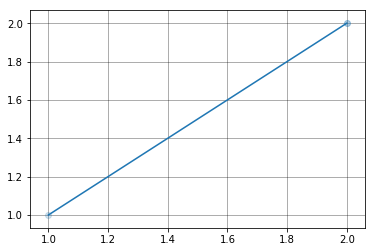

In [7]:
print(type(arr.val_float[0]))
ml.plt_pq(arr, arr)


In [8]:
sp.log(32*u.cm)

log(32*centimeter)

In [10]:
x = ml.PQ(2.0*u.milli*u.m, sigma=0.1*u.milli*u.m)
x.sigma

AttributeError: 'Mul' object has no attribute 'scale_factor'